## Titanic Survival Prediction

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1 : Read the train dataset

In [3]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

## Step 2: Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
s = df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.duplicated().sum()

0

## Step 3: Separate X and Y features
Our target feature Y is to predict the survival of passengers from titanic

In [8]:
X = df.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin'])
Y = df[['Survived']]

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

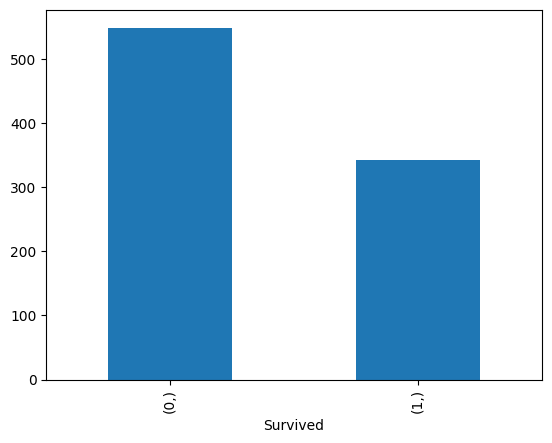

In [12]:
Y.value_counts().plot(kind='bar')

We can note from the graph that persons survied are less than half of the total persons boarded titanic

## Step 4 : Build pipeline for data preprocessing

In [13]:
# categorical and conitnuous feature separation
cat = X.columns[X.dtypes=='object']
con = X.columns[X.dtypes!='object']

In [14]:
cat

Index(['Sex', 'Embarked'], dtype='object')

In [15]:
con

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [18]:
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [19]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [20]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Sex', 'Embarked'], dtype='object'))])

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


## Step 5: Train test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [23]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,0.000000,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.130754,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.515526,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.208115,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.023154,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [24]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [25]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.284663,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.823344,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.746389,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,0.000000,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.484880,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [26]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


## Step 6: Model Building

### Alogrithm Evaluation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
dct = {'Logistic':LogisticRegression(),
       'Decision Tree':DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),
       'XGBoost' : XGBClassifier(),
       'KNN':KNeighborsClassifier(),
       'SVM':SVC()}

In [29]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('KNN', KNeighborsClassifier()), ('SVM',

In [31]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
train_res = []
test_res = []
train_cv = []

for name,model in dct.items():
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Get F1 macro score for train and test
    f1_train = f1_score(ytrain,ypred_train,average='macro')
    f1_test = f1_score(ytest,ypred_test,average='macro')
    # Cross validate the scores
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
    f1_cv=scores.mean()
    # print the results
    print(f'Model : {name}')
    print(f'Training scores : {round(f1_train,2)}')
    print(f'Testing scores : {round(f1_test,2)}')
    print(f'Cross validated Training scores: {round(f1_cv,2)}')
    print('------------------------------------------')

    # Append above results in lists
    train_res.append(round(f1_train,2))
    test_res.append(round(f1_test,2))
    train_cv.append(round(f1_cv,2))


Model : Logistic
Training scores : 0.79
Testing scores : 0.79
Cross validated Training scores: 0.78
------------------------------------------
Model : Decision Tree
Training scores : 0.98
Testing scores : 0.78
Cross validated Training scores: 0.76
------------------------------------------
Model : Random Forest
Training scores : 0.99
Testing scores : 0.82
Cross validated Training scores: 0.78
------------------------------------------
Model : Gradient Boost
Training scores : 0.89
Testing scores : 0.83
Cross validated Training scores: 0.78
------------------------------------------
Model : XGBoost
Training scores : 0.97
Testing scores : 0.83
Cross validated Training scores: 0.78
------------------------------------------
Model : KNN
Training scores : 0.84
Testing scores : 0.81
Cross validated Training scores: 0.78
------------------------------------------
Model : SVM
Training scores : 0.83
Testing scores : 0.83
Cross validated Training scores: 0.8
--------------------------------------

## Create a dataframe to show above results

In [32]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XGBoost', 'KNN', 'SVM'])

In [33]:
res = {'Name':list(dct.keys()),
       'Train':train_res,
       'Test':test_res,
       'train_cv':train_cv}

In [34]:
df_res = pd.DataFrame(res)
df_res.sort_values(by='train_cv', ascending=False,inplace=True)

In [35]:
df_res

,Name,Train,Test,train_cv
6,SVM,0.83,0.83,0.80
0,Logistic,0.79,0.79,0.78
2,Random Forest,0.99,0.82,0.78
3,Gradient Boost,0.89,0.83,0.78
4,XGBoost,0.97,0.83,0.78
5,KNN,0.84,0.81,0.78
1,Decision Tree,0.98,0.78,0.76


## From above results Train Cross validation result is highest for SVM hence choosing SVM for final predictions

In [36]:
svc_model = SVC()
svc_model.fit(xtrain,ytrain)

SVC()

In [37]:
svc_model.score(xtrain,ytrain)

0.8426966292134831

In [38]:
svc_model.score(xtest,ytest)

0.8379888268156425

In [39]:
ypred_test1 = svc_model.predict(xtest)

## Evaluate SVC model
Plot Confusion Matrix Display and Classification report

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

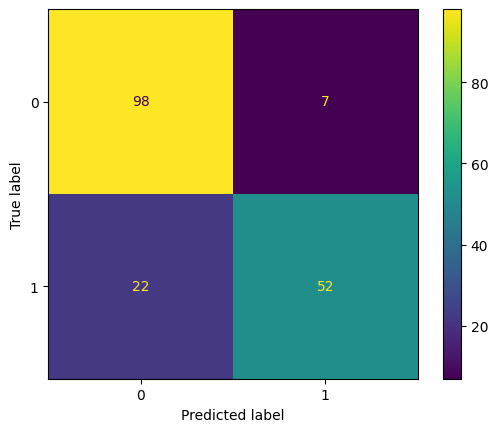

In [41]:
cm = confusion_matrix(ytest,ypred_test1)
ConfusionMatrixDisplay(cm,display_labels=svc_model.classes_).plot()

In [42]:
print(classification_report(ytest,ypred_test1,labels=svc_model.classes_))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       105
           1       0.88      0.70      0.78        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



In [43]:
ypred_test1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
ytest.head(10)

,Survived
617,0
379,0
725,0
826,0
450,0
147,0
698,0
397,0
525,0
505,0


## As we can observe that the f1-score- macro avg is 0.83, accuracy is 0.84 . This is good model. 
Before proceeding with final prediction, I also want to try Gradient Boost model by tuning the hyperparameters to see if it results in best score

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
model2 =GradientBoostingClassifier(learning_rate=0.1,n_estimators=1,min_samples_split=5,min_samples_leaf=5,max_depth=1)
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                           n_estimators=1)

In [46]:
model2.score(xtrain,ytrain)

0.6235955056179775

In [47]:
model2.score(xtest,ytest)

0.5865921787709497

### Hyperparameter tuning

In [48]:
params1 = {'learning_rate' :[0.01,0.1,0.15,0.2],
           'n_estimators':[10,50,100,200,300,500],
           'min_samples_split':[5,6,7,8,9,10],
           'max_depth':[2,3,4,5]}

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc,param_distributions=params1,cv=5,scoring='f1_macro')
rscv2.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         500]},
                   scoring='f1_macro')

In [52]:
rscv2.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'max_depth': 3,
 'learning_rate': 0.01}

In [53]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.01, min_samples_split=8)

## Evaluate Gradient Boosting Classifier

In [54]:
best_gbc.score(xtrain,ytrain)

0.8356741573033708

In [55]:
best_gbc.score(xtest,ytest)

0.8100558659217877

### Predict results for train and test

In [56]:
ypred_train2 = best_gbc.predict(xtrain) 
ypred_test2 = best_gbc.predict(xtest)

In [57]:
ypred_train2[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [58]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [59]:
ypred_test2[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [60]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


## Plot confusion matrix

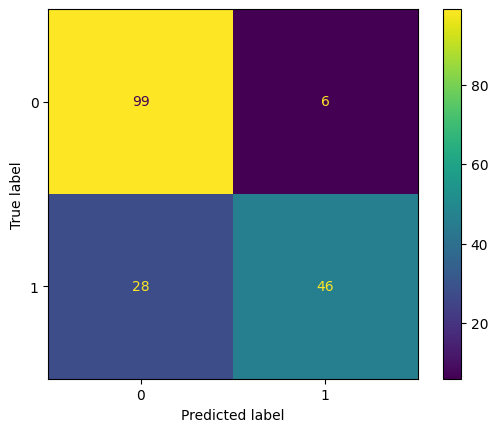

In [61]:
cf1 = confusion_matrix(ytest,ypred_test2)
cfd1 = ConfusionMatrixDisplay(cf1,display_labels=best_gbc.classes_)
cfd1.plot()

## print classification report for gradient boosting

In [62]:
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       105
           1       0.88      0.62      0.73        74

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179



#### As we can observe Gradient Boost Classifier provides f1 score - macro avg as 0.79, accuracy as 0.81 . 
#### SVC is performing better than Gradient Boost by providing the f1-score- macro avg as 0.83, accuracy as 0.84 
## SVC(Support Vector Classifier) is the best model. We can use this model for final predictions
